# Clustering using DBSCAN

## Author: Will Furnass

DBSCAN is an n-dimensional clustering algorithm that has the advantages over other clustering algorithms of 
 - not requiring the number of points to be specified in advance and   
 - differentiating between clustered points and noise points
 - clusters can be non-spherical

Here we use the [DBSCAN implementation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) provided by the [scikit-learn](http://scikit-learn.org/) package to cluster a 2D dataset.  The algorithm enumerates distinct clusters using integer labels (assigning -1 to noise points); here these labels are plotted in 2D using the [matplotlib](http://matplotlib.org/) library.  

Run the cell below then use the two sliders to assess the impact of changing DBSCAN's two key parameters:

 - `eps`: The maximum distance between two samples for them to be considered as in the same neighborhood.
 - `min_pts`: The number of samples (or total weight) in a neighborhood for a point to be considered as a *core point*. This includes the point itself.

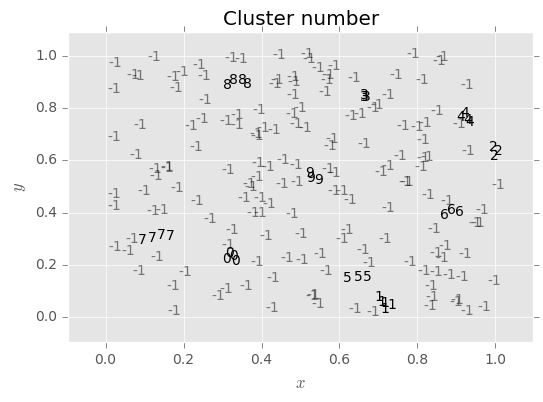

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
from ipywidgets import interact, widgets
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# Create some dummy 2D data by sampling from a uniform distribution  
data_matr = np.random.rand(200, 2)

# Calculate margins for plotting the dataset later
x_min, y_min = data_matr.min(axis=0)
x_max, y_max = data_matr.max(axis=0)
x_margin = (x_max - x_min) * 0.1
y_margin = (y_max - y_min) * 0.1

def render_glyphs(data_matr, int_glyphs, ax):
    """Create a scatter plot of integer glyphs given a 2D data matrix and matplotlib.Axes."""
    for (x, y), g in zip(data_matr, int_glyphs):
        is_noise = g < 0
        ax.text(x, y, str(g), alpha=0.5 if is_noise else 1.0)

def update_dbscan_plot(eps, min_pts):
    """Cluster `data_matr` and generate a plot of the cluster labels."""
    
    # DBSCAN clustering
    dist_matr = euclidean_distances(data_matr)
    dbscan = DBSCAN(eps=eps, min_samples=min_pts, metric='precomputed',
               algorithm='auto', leaf_size=30, p=None, n_jobs=1)
    dbscan.fit(dist_matr)
    
    # Generate plot
    fig, ax = plt.subplots()
    render_glyphs(data_matr, dbscan.labels_, ax)
    ax.set_xlim(x_min - x_margin, x_max + x_margin)
    ax.set_ylim(y_min - y_margin, y_max + y_margin)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title('Cluster number')

# Enable interactive exploration of the DBSCAN 
interact(update_dbscan_plot, 
         eps=widgets.FloatSlider(value=0.03, min=1e-10, max=0.4, step=0.005, readout_format='.3f'),
         min_pts=widgets.IntSlider(value=3, min=2, max=15, step=1, readout_format='i'));

### References
* Ester, M., Kriegel, H., Sander, J., Xu, X. (1996). A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise.  Presented at the *Second International Conference on Knowledge Discovery and Data Mining*, AAAI Press, pp. 226–231.

### Keywords
* DBSCAN
* clustering

### Requirements

- scikit-learn
- numpy
- matplotlib
- ipywidgets 

### License
This notebook is distributed under a [Creative Commons license (CC-BY 4.0)](https://creativecommons.org/licenses/by/4.0/)